<a href="https://colab.research.google.com/github/Bhavanikotte/oibsip_taskno/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Analysing** **the** **DataSet**

In [ ]:
sales_data=pd.read_csv('/content/drive/MyDrive/Advertising.csv',index_col=0)

In [ ]:
sales_data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
sales_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Visualizing** **the** **Data**

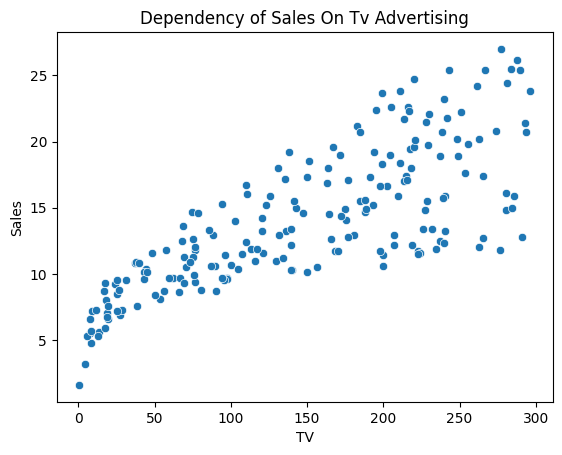

In [ ]:
sns.scatterplot(x='TV',y='Sales',data=sales_data)
plt.title("Dependency of Sales On Tv Advertising")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

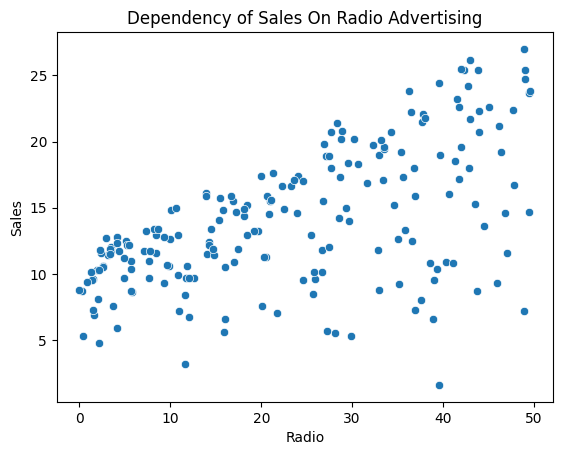

In [ ]:
sns.scatterplot(x='Radio',y='Sales',data=sales_data)
plt.title("Dependency of Sales On Radio Advertising")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

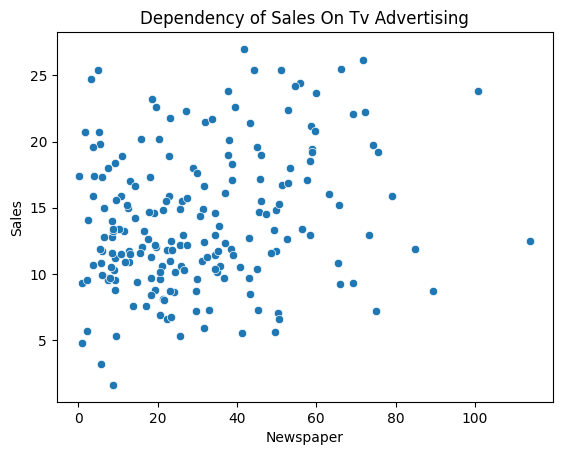

In [ ]:
sns.scatterplot(x='Newspaper',y='Sales',data=sales_data)
plt.title("Dependency of Sales On Tv Advertising")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

<Axes: >

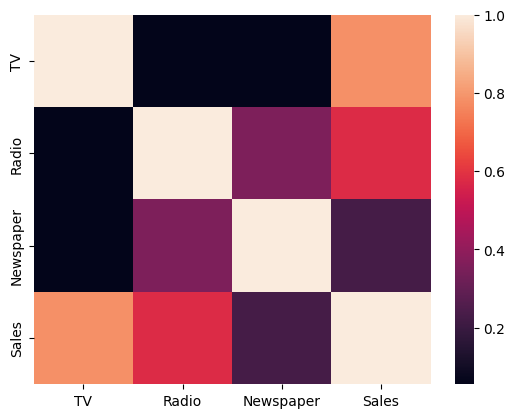

In [ ]:
sns.heatmap(sales_data.corr())

<ipython-input-28-e3b89b2e2dd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Sales'].dropna(),kde=False,color='cyan')


<Axes: xlabel='Sales'>

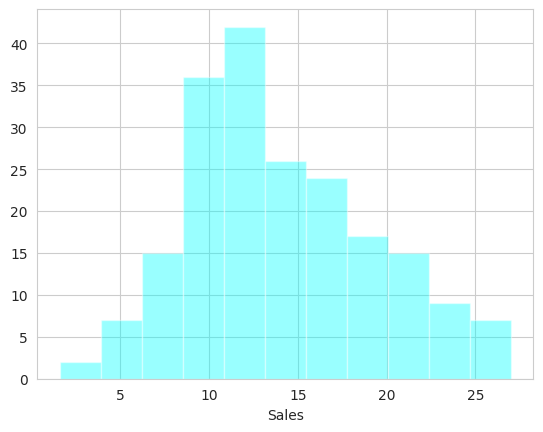

In [ ]:
sns.distplot(sales_data['Sales'].dropna(),kde=False,color='cyan')

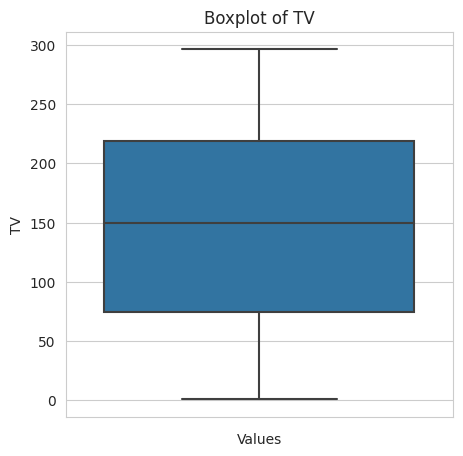

In [ ]:
plt.figure(figsize=(5, 5))  # Optional: Set the figure size
sns.boxplot(y=sales_data['TV'])
plt.title(f'Boxplot of TV')
plt.xlabel('Values')
plt.ylabel('TV')
plt.show()

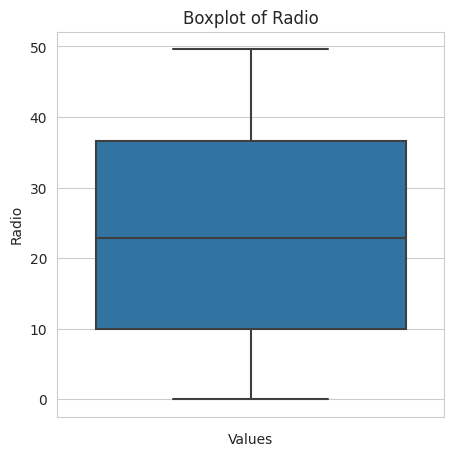

In [ ]:
plt.figure(figsize=(5, 5))  # Optional: Set the figure size
sns.boxplot(y=sales_data['Radio'])
plt.title(f'Boxplot of Radio')
plt.xlabel('Values')
plt.ylabel('Radio')
plt.show()

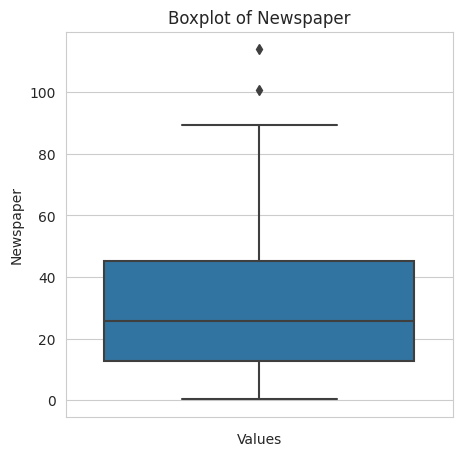

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=sales_data['Newspaper'])
plt.title(f'Boxplot of Newspaper')
plt.xlabel('Values')
plt.ylabel('Newspaper')
plt.show()

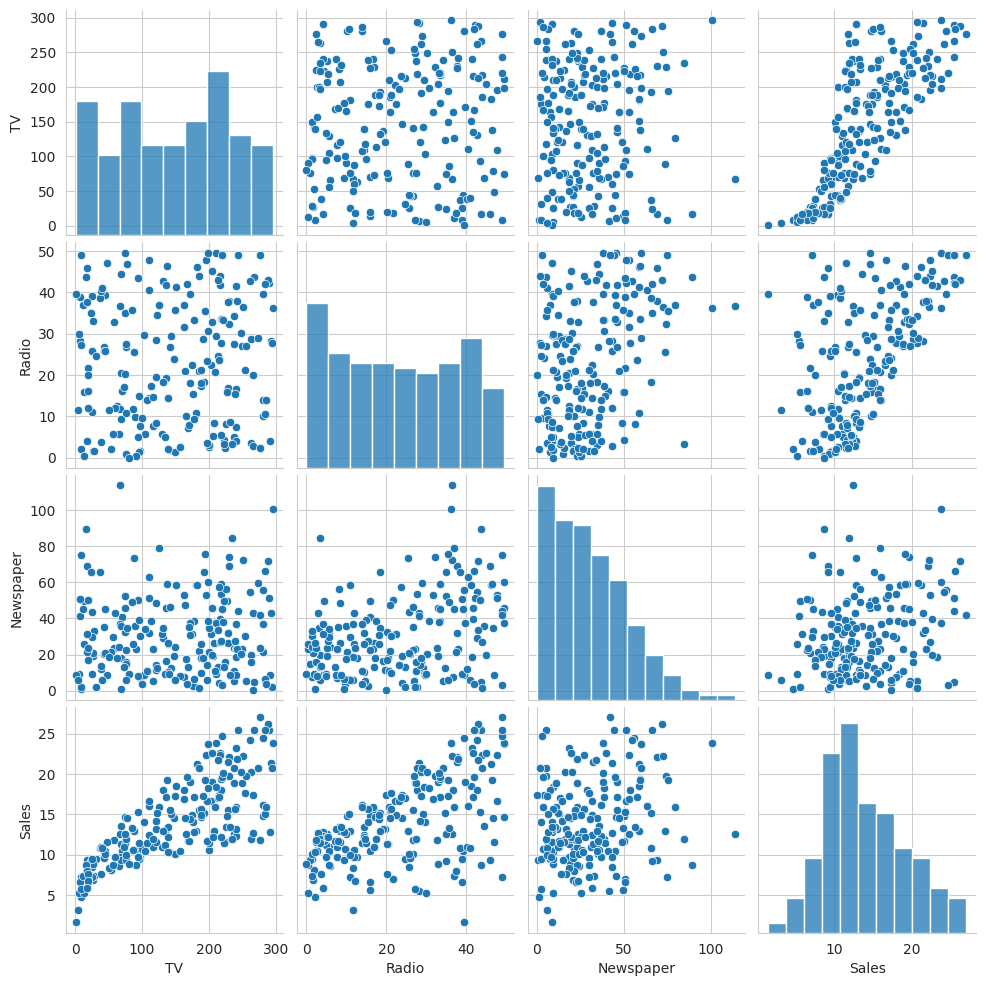

In [ ]:
sns.pairplot(sales_data)

**Splitting** **the** **DataSet**

In [ ]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test=train_test_split(sales_data[['TV']],sales_data[['Sales']],train_size=0.3,random_state=0)

In [52]:
X_train

,TV
120,19.4
103,280.2
36,290.7
58,136.2
66,69.0
2,44.5
121,141.3
163,188.4
43,293.6
106,137.9


In [53]:
y_train

,Sales
120,6.6
103,14.8
36,12.8
58,13.2
66,9.3
2,10.4
121,15.5
163,14.9
43,20.7
106,19.2


**Building** **the** **Regression** **Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [54]:
lm=LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
print(lm.intercept_)

[7.92503365]


In [60]:
lm.coef_

array([[0.04158884]])

In [61]:
predictions=lm.predict(X_test)

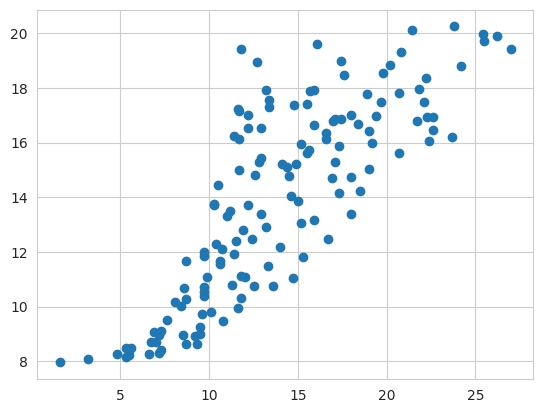

In [62]:
plt.scatter(y_test,predictions)

<ipython-input-63-ae5aeb1ddd56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50,kde=True);


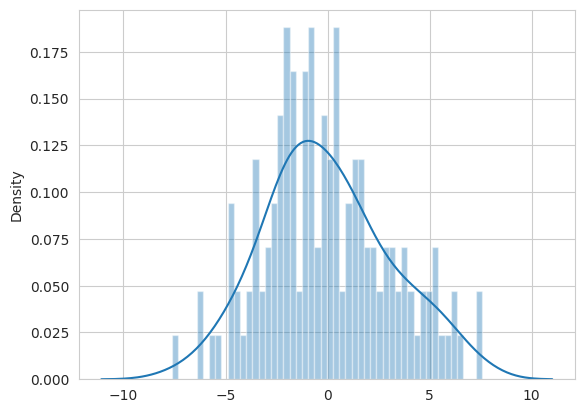

In [63]:
sns.distplot((y_test-predictions),bins=50,kde=True);

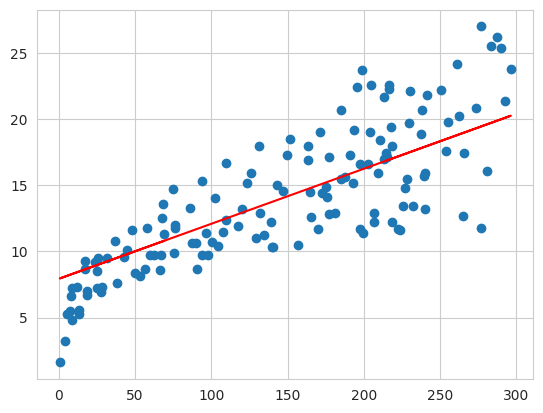

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.92503365+0.04158884*X_test,'r')
plt.show()

**Understanding** **Predictive** **Performance** **Of** **Model**

In [64]:
from sklearn import metrics

In [65]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.4728026076863436
MSE: 9.499824562747865
RMSE: 3.0821785416727345
